
<h1 style="text-align:center;">Minerando Dados </h1>
<h2 style="text-align:center;"> Identificando Outliers</h2>

## Introdução 
Existem certos processamentos ou pré-processamentos que, caso não sejam executados de forma efetiva durante a análise exploratória dos dados, podem acarretar impactos significativos no ponto de vista estatístico e de modelagem de machine learning. Um desses processos é a detecção e tratamento de outliers. 

## O que são Outliers ?

Outliers são valores extremos que são significativamente diferentes das demais observações. Esses valores geralmente encontram-se fora do padrão da distribuição dos dados. Por exemplo, caso tenhamos dados com uma distribuição normal, alguns valores nas caldas da distribuição podem ser caracterizados como outliers. 

Não existe uma maneira exata de definir e identificar outliers. Cada dataset possui sua especificidade e a interpretação dos dados feita por um especialista da área de negócios ou da pesquisa em questão é fundamental para decidir se os valores são de fato outlirs ou não.

## Como outliers podem ser introduzidos nos datasets ?

* Erros mecânicos ou humanos
    * Erros de medidas ou de digitação
    * Corrupção de dados
* Valores extremos genuínos ( Ronaldinho Gaúcho no Futebol) 

## Relevância em termos de negócio:
* Modelagem de Fraude em cartão de crédito
    * Outlier pode indicar fralde
* Inserção errônea de dados em um dadaset
    * Não necessariamente possui relevância em termos de negócio

## Impactos dos Outliers 

* Pode inpactar na média e no desvio padrão da amostra

## Como podemos identificar Outliers ?
* Análise Quantitativa:
    * Z-Score
    * Amplitude interquartil 
* Análise Qualitativa:    
    * scatter plot 
    * Box Plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm



# Identificando Outlier com Z- Score

* O z-score nos dá uma idéia do quanto um determinado ponto está afastado da média dos dados.
    * Mede quantos desvios padrão abaixo ou acima da média populacional ou amostral os dados estão  

\begin{equation*}
\large
z = 
\frac{x -  \mu}{\sigma} 
\end{equation*}






**Onde:**
- **x:  observação**
- **𝜇:  média**
- **𝜎: desvio padrão**

## Distribuição Normal

Quanto mais longe o Z-score de uma observação está de zero, mais incomum ele é. Um valor de corte padrão para encontrar outliers são escores Z de +/- 3 ou mais longe de zero. A distribuição de probabilidade abaixo exibe a distribuição dos escores Z em uma distribuição normal padrão. Os escores Z além de +/- 3 são tão extremos que você mal consegue ver o sombreamento sob a curva.

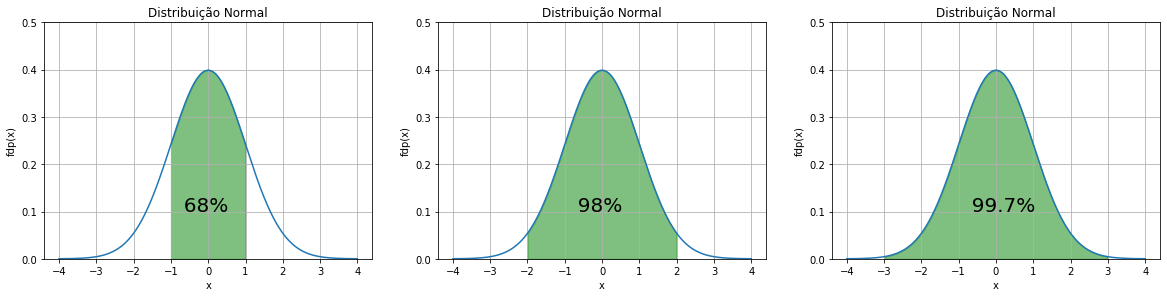

In [2]:
i=1
plt.figure(figsize=(20,20))

for c in ['  68%', '  98%', '  99.7%']:   
    
    plt.subplot(4,3,i)
    x= np.arange(-4,4,0.001)
    plt.plot(x, norm.pdf(x))
    plt.title("Distribuição Normal")
    plt.xlabel('x')
    plt.ylabel('fdp(x)')
    plt.grid(True)
    # preencher 
    px=np.arange(-i,i,0.01)
    plt.ylim(0,0.5)
    plt.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
    # texto
    plt.text(-1,0.1, c , fontsize=20)
    i += 1
    
plt.show()

In [3]:
# import random
import random

dataset = random.sample(range(0, 40), 30)
dataset.insert( 8, 1500)
dataset.insert( 3, 1550)

print(dataset)

[5, 13, 39, 1550, 35, 16, 25, 20, 7, 1500, 22, 28, 33, 9, 37, 23, 30, 1, 27, 18, 8, 10, 15, 36, 29, 6, 26, 38, 31, 3, 21, 24]


In [4]:
outliers=[]

def find_outliers(data_set):
    corte_dp =3
    media = np.mean(data_set)
    dp =np.std(data_set)
    
    
    for dado in data_set:
        
        z_score = (dado - media)/dp 
        if np.abs(z_score) >= corte_dp:
            outliers.append(dado)
            
    #print('Os outliers são: ', outliers)
    
    return outliers

In [5]:
outliers = find_outliers(dataset)
outliers

[1550, 1500]

# Identificando Outlier com Amplitude interquartil

### Percentil

- percentil 25 : primeiro quartil
- percentil 50 : segundo quartil ou mediana
- percentil 75 : terceito quartil

    

In [6]:
data = random.sample(range(1, 11), 10)
data

[6, 1, 8, 2, 3, 7, 10, 5, 4, 9]

In [7]:
p75, p50 = np.percentile(data , [75 ,50])
print('Percentil 75: ',p75)
print('Percentil 50 (mediana): ',p50)

Percentil 75:  7.75
Percentil 50 (mediana):  5.5


In [8]:
data.sort()
data


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## Amplitude interquartil

- Diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1)

### Como determinar Outlier com AI:
1. Ordena os dados de forma crescente
2. Calcula primeiro e terceiro quartil
3. Determina a Amplitude interquartil
4. Encontre o limite inferior Q1 * 1,5
5. Encontre o limite superior Q3 * 1,5

In [9]:
# import random
dataset = random.sample(range(0, 40), 30)
dataset.insert( 8, 1500)
dataset.insert( 3, 1550)

print(dataset)

[26, 14, 3, 1550, 36, 4, 13, 6, 2, 1500, 27, 35, 22, 21, 0, 30, 25, 20, 8, 23, 11, 31, 37, 18, 7, 10, 24, 33, 9, 28, 15, 34]


In [10]:
Q1, Q3 = np.percentile(dataset , [25 ,75])
print('Primeiro Quartil ou Pecentil 25: ',Q1)
print('Terciro quartil ou percentil 75  ',Q3)

Primeiro Quartil ou Pecentil 25:  9.75
Terciro quartil ou percentil 75   30.25


In [11]:
Amp_interquartil = Q3 - Q1
print(Amp_interquartil)

20.5


In [12]:
# determinar o limite inferior e o limite superior
limite_inferior = Q1 - (1.5 * Amp_interquartil)
limite_superior = Q3 + (1.5 * Amp_interquartil)

print('Limite Inferior: ',limite_inferior )
print('Limite Superior: ',limite_superior )

Limite Inferior:  -21.0
Limite Superior:  61.0


- Dessa forma, considerando esse critério, podemos afirmar que valores superiores a **65.625** e inferiores a **-25.375** são outlirers

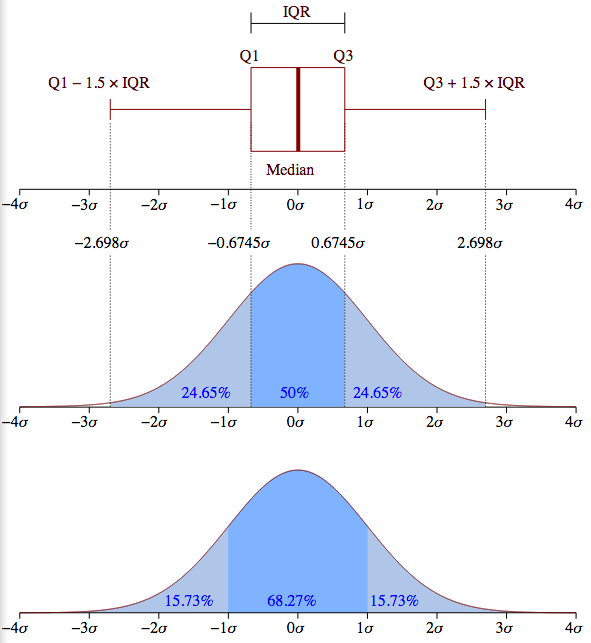

In [13]:
from IPython.display import Image
Image(filename='iqr.png') 

In [ ]:
#fonte foto : https://stackoverflow.com/questions/17725927/boxplots-in-matplotlib-markers-and-outliers